# MACHINE LEARNING INTERN - CODSOFT

# TASK 3 CUSTOMER CHURN PREDICTION

In [1]:
#Loadiing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading Dataset
ccp = pd.read_csv('Churn_Modelling.csv')
ccp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# checking size of the Dataset
ccp.shape

(10000, 14)

In [4]:
# checking Null values
ccp.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Checking duplicate values
ccp.duplicated().sum()

0

In [6]:
# checking descreptive of the dataset 
ccp.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
ccp.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
# checking information of the dataset
ccp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


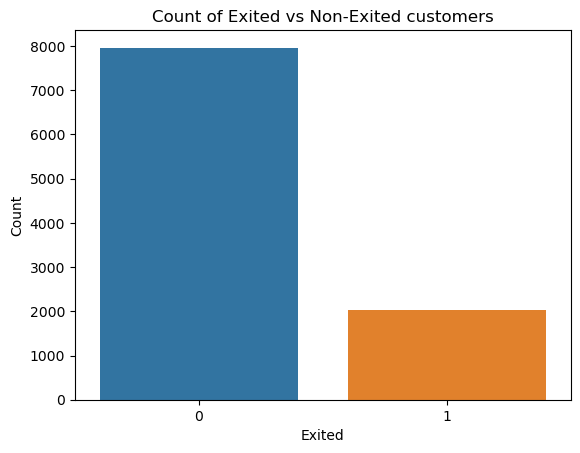

In [9]:
# Visualizations
sns.countplot(data=ccp,x='Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited vs Non-Exited customers')
plt.show()

In [10]:
ccp['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

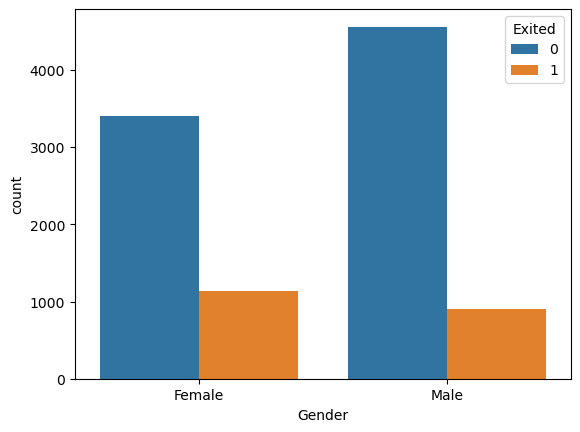

In [11]:
sns.countplot(x='Gender',hue='Exited',data=ccp)

<Axes: xlabel='Geography', ylabel='count'>

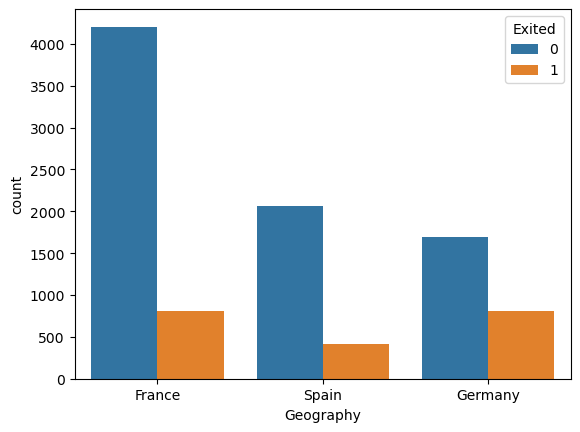

In [12]:
sns.countplot(x='Geography',hue='Exited',data=ccp)

In [13]:
# Data Processing

In [14]:
9# Dropping unnecessary columns
ccp = ccp.drop(['CustomerId','RowNumber'],axis=1)

In [15]:
ccp.shape

(10000, 12)

In [16]:
# Importing Label encoder
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
for column in ccp.columns:
    if ccp[column].dtype==np.number:
        continue
    ccp[column]=le.fit_transform(ccp[column])

In [18]:
ccp.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0


In [19]:
x = ccp.drop('Exited',axis=1)
y = ccp.Exited

In [20]:
x.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57
3,289,308,0,0,21,1,0.00,1,0,0,93826.63
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [22]:
# Scsling the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_feature = sc.fit_transform(x)
x_feature[0]

array([-0.46418322, -0.32733113, -0.90188624, -1.09598752,  0.29379269,
       -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
        0.02188649])

In [23]:
# Train test split
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_feature,y,test_size=0.3,random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


# Model Selection

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

LogisticRegression()

In [28]:
predict = log_reg_model.predict(x_test)

In [29]:
for i in predict[0:15]:
    if 1 == 0:
        print('Customer will not churn')
    else:
        print('Customer will churn')

Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn


In [30]:
print(log_reg_model.score(x_test,y_test)*100,'%')

81.86666666666666 %


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
log_reg_pred = log_reg_model.predict(x_test)
log_reg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_accuracy

0.8186666666666667

In [34]:
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)
log_reg_conf_matrix

array([[2350,   66],
       [ 478,  106]], dtype=int64)

In [35]:
log_reg_class_report = classification_report(y_test, log_reg_pred)
print(log_reg_class_report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.62      0.18      0.28       584

    accuracy                           0.82      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.79      0.82      0.78      3000



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
rf_pred = rf_model.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.8683333333333333

In [40]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

array([[2351,   65],
       [ 330,  254]], dtype=int64)

In [41]:
rf_class_report = classification_report(y_test, rf_pred)
print(rf_class_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.80      0.43      0.56       584

    accuracy                           0.87      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [42]:
predict = rf_model.predict(x_test)

In [43]:
for i in predict[0:15]:
    if 1 == 0:
        print('Customer will not churn')
    else:
        print('Customer will churn')

Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn
Customer will churn


In [44]:
print(rf_model.score(x_test,y_test)*100,'%')

86.83333333333333 %


In [45]:
# Getting feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_
feature_importances

array([0.1163611 , 0.11772177, 0.0326373 , 0.01765188, 0.22215483,
       0.06902423, 0.11885881, 0.13016515, 0.0166018 , 0.03801894,
       0.1208042 ])